In [226]:
%matplotlib inline
from matplotlib import pyplot as plt

%load_ext abjadext.ipython
from abjad import *

import numpy as np

from functools import partial, reduce
from fractions import Fraction
from random import shuffle, random, randint

The abjadext.ipython extension is already loaded. To reload it, use:
  %reload_ext abjadext.ipython


In [180]:
def normalize(xs, a=0.0, b=1.0):
    return (b - a) * (xs - np.min(xs)) / (np.max(xs) - np.min(xs)) + a

def compose(*functions):
    return reduce(lambda g, f: lambda x: f(g(x)), functions, lambda x: x)

In [181]:
def fract(_xs):
    new_xs = [_xs[0]]
    
    for xi, xii in zip (_xs[:-1], _xs[1:]):
        new_xs += list(normalize(_xs, xi, xii))[1:]
      
    return new_xs

In [219]:
# xs = [0., 0.33, .75, 1.]
# ys = [-1., .75, -.33, 1.]
xs = [0., 3/12, 7/12, 1.]
ys = [-1., 3/12, -5/12, 1.]
# xs = [0., 1/5, 2/7, 3/8, 3/7, 4/7, 5/8, 5/7]
# ys = [-1., -4/12, -5/12, 0., -1/12, 8/12, 7/12, 1.]

In [239]:
xs = [0.] + sorted([random () for _ in range(3)]) + [1.]
ys = [-1.] + [randint(-11, 11)/12 for _ in range(3)] + [1.]

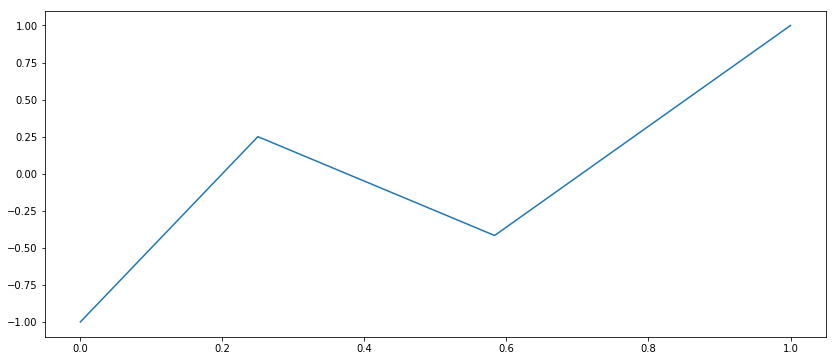

In [252]:
plt.figure(figsize=(14,6))
plt.plot(xs, ys)
plt.show()

In [241]:
mxs, mys = fract(xs), fract(ys)
mxs, mys = fract(mxs), fract(mys)
# mxs, mys = fract(mxs), fract(mys)

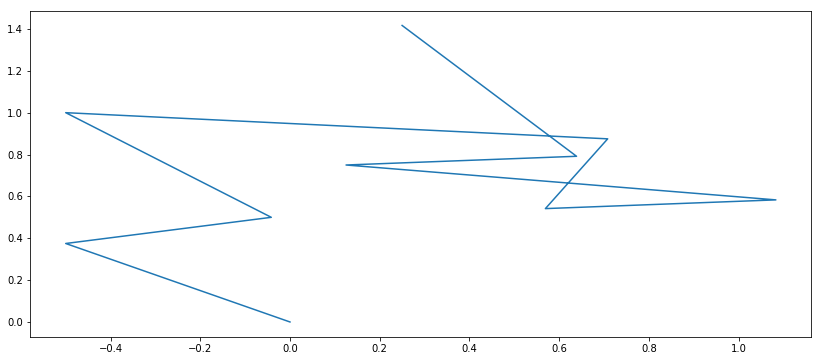

In [258]:
plt.figure(figsize=(14,6))
plt.plot(mxs, mys)
plt.show()

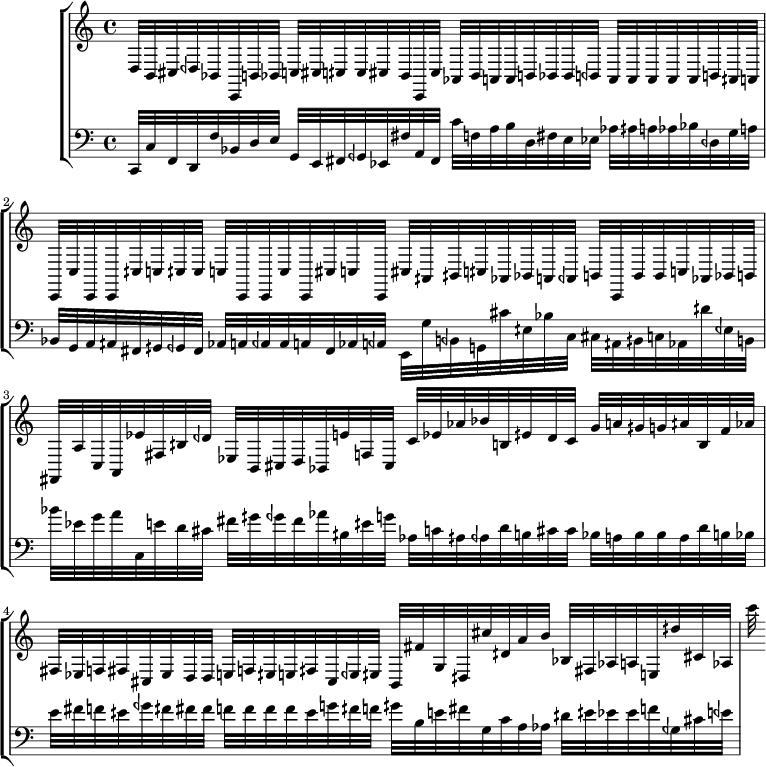

In [243]:
pitches = normalize(mys, 0., 48,) - 24
durations = list(normalize(np.diff(mxs), 1/4, 1)) + [1.]
durations = [Fraction(d).limit_denominator(4) for d in durations]

notes = [Note(pitch, (1, 32)) for pitch, duration in zip(pitches, durations)]
staff_1 = Staff(notes[len(notes)//2:])
staff_2 = Staff(notes[:len(notes)//2])
staff_group = StaffGroup([staff_1, staff_2])
leaf = inspect(staff_2).get_leaf(0)
attach(Clef('bass'), leaf)
show(staff_group)

In [244]:
play(staff_group)

<audio controls type="audio/ogg" src="data:audio/ogg;base64,T2dnUwACAAAAAAAAAAB/+rdZAAAAAI4bkL4BHgF2b3JiaXMAAAAAAkSsAAD/////APQBAP////+4AU9nZ1MAAIAAAAAAAAAAf/q3WQEAAAC8rWzcFGH/////////////////////PD05A3ZvcmJpcywAAABYaXBoLk9yZyBsaWJWb3JiaXMgSSAyMDE1MDEwNSAo4puE4puE4puE4puEKQEAAAAhAAAATE9DQVRJT049L3RtcC90bXAzbmp1MmllNC9vdXQub2dnAQV2b3JiaXMpQkNWAQAIAACAIkwYxIDQkFUAABAAAKCsN5Z7yL333nuBqEcUe4i9995746xH0HqIuffee+69pxp7y7333nMgNGQVAAAEAIApCJpy4ELqvfceGeYRURoqx733HhmFiTCUGYU9ldpa6yGT3ELqPeceCA1ZBQAAAgBACCGEFFJIIYUUUkghhRRSSCmlmGKKKaaYYsoppxxzzDHHIIMOOuikk1BCCSmkUEoqqaSUUkot1lpz7r0H3XPvQfgghBBCCCGEEEIIIYQQQghCQ1YBACAAAARCCCFkEEIIIYQUUkghpphiyimngNCQVQAAIACAAAAAAEmRFMuxHM3RHM3xHM8RJVESJdEyLdNSNVMzPVVURdVUVVdVXV13bdV2bdWWbddWbdV2bdVWbVm2bdu2bdu2bdu2bdu2bdu2bSA0ZBUAIAEAoCM5kiMpkiIpkuM4kgSEhqwCAGQAAAQAoCiK4ziO5EiOJWmSZnmWZ4maqJma6KmeCoSGrAIAAAEABAAAAAAA4HiK53iOZ3mS53iOZ3map2mapmmapmmapmmapmmapmmapmmapmmapmmapmmapmmapmmapmmapmmapmlAaMgqAEACAEDHcRzHcRzHcRxHciQHCA1ZBQDIAAAIAEBSJMdyLEdzNMdzPEd0RMd0TMmUVMm1XAsIDVkFAAACAAgAAAAAAEATLEVTPMeTPM8TNc/TNM0TTVE0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TdM0TVMUgdCQVQAABAAAIZ1mlmqACDOQYSA0ZBUAgAAAABihCEMMCA1ZBQAABAAAiKHkIJrQmvPNOQ6a5aCpFJvTwYlUmye5qZibc84555xszhnjnHPOKcqZxaCZ0JpzzkkMmqWgmdCac855EpsHranSmnPOGeecDsYZYZxzzmnSmgep2Vibc85Z0JrmqLkUm3POiZSbJ7W5VJtzzjnnnHPOOeecc86pXpzOwTnhnHPOidqba7kJXZxzzvlknO7NCeGcc84555xzzjnnnHPOCUJDVgEAQAAABGHYGMadgiB9jgZiFCGmIZMedI8Ok6AxyCmkHo2ORkqpg1BSGSeldILQkFUAACAAAIQQUkghhRRSSCGFFFJIIYYYYoghp5xyCiqopJKKKsoos8wyyyyzzDLLrMPOOuuwwxBDDDG00kosNdVWY4215p5zrjlIa6W11lorpZRSSimlIDRkFQAAAgBAIGSQQQYZhRRSSCGGmHLKKaegggoIDVkFAAACAAgAAADwJM8RHdERHdERHdERHdERHc/xHFESJVESJdEyLVMzPVVUVVd2bVmXddu3hV3Ydd/Xfd/XjV8XhmVZlmVZlmVZlmVZlmVZlmUJQkNWAQAgAAAAQgghhBRSSCGFlGKMMcecg05CCYHQkFUAACAAgAAAAABHcRTHkRzJkSRLsiRN0izN8jRP8zTRE0VRNE1TFV3RFXXTFmVTNl3TNWXTVWXVdmXZtmVbt31Ztn3f933f933f933f933f13UgNGQVACABAKAjOZIiKZIiOY7jSJIEhIasAgBkAAAEAKAojuI4jiNJkiRZkiZ5lmeJmqmZnumpogqEhqwCAAABAAQAAAAAAKBoiqeYiqeIiueIjiiJlmmJmqq5omzKruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6ruu6QGjIKgBAAgBAR3IkR3IkRVIkRXIkBwgNWQUAyAAACADAMRxDUiTHsixN8zRP8zTREz3RMz1VdEUXCA1ZBQAAAgAIAAAAAADAkAxLsRzN0SRRUi3VUjXVUi1VVD1VVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVXVNE3TNIHQkJUAABkAAMO05NJyz42gSCpHtdaSUeUkxRwaiqCCVnMNFTSISYshYgohJjGWDjqmnNQaUykZc1RzbCFUiEkNOqZSKQYtCEJDVggAoRkADscBJMsCJEsDAAAAAAAAAEnTAM3zAMvzAAAAAAAAAEDSNMDyNEDzPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJE0DNM8DNM8DAAAAAAAAAM3zAE8UAU8UAQAAAAAAAMDyPMATPcATRQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHE0DNM8DNM8DAAAAAAAAAMvzAE8UAc8TAQAAAAAAAEDzPMATRcATRQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAEOAAABFkKhISsCgDgBAIckQZIgSdA0gGRZ0DRoGkwTIFkWNA2aBtMEAAAAAAAAAAAAQPI0aBo0DaIIkDQPmgZNgygCAAAAAAAAAAAAIGkaNA2aBlEESJoGTYOmQRQBAAAAAAAAAAAA0EwToghRhGkCPNOEKEIUYZoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgAAAgAEHAIAAE8pAoSErAoA4AQCHolgWAAA4kmNZAADgOJJlAQCAZVmiCAAAlqWJIgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAAACAAQcAgAATykChISsBgCgAAIeiWBZwHMsCjmNZQJIsC2BZAM0DaBpAFAGAAACAAgcAgAAbNCUWByg0ZCUAEAUA4FAUy9I0UeQ4lqVposiRLEvTRJFlaZrnmSY0zfNMEaLneaYJz/M804RpiqKqAlE0TQEAAAUOAAABNmhKLA5QaMhKACAk

In [ ]:
pitches = normalize(mys, -36., 36,)
durations = list(normalize(np.diff(mxs), 1/32, 1)) + [1.]

In [ ]:
tuplet = Tuplet((4, 5), "c16 c c c c")
measure = Measure((4, 16), [tuplet])
leaves = select(measure).by_leaf()
beam = Beam()
attach(beam, leaves)
staff = Staff([measure], context_name='RhythmicStaff')
show(staff)

In [268]:
xs = [0., 3/12, 7/12, 1.]
ys = [0., .75, .25, 1.]
mxs, mys = fract(xs, ys)

In [269]:
def fract(xs_, ys_):
    coords = [x + y*1j for x, y in zip(xs_, ys_)]
    new_coords = [coords[0]]
    
    for axi, axii in zip (coords[:-1], coords[1:]):
        axis = axii - axi
        for point in coords[1:]:
            new_coords.append(point * axis + axi)
    
    xs, ys = [x.real for x in new_coords], [x.imag for x in new_coords]
    return xs, ys

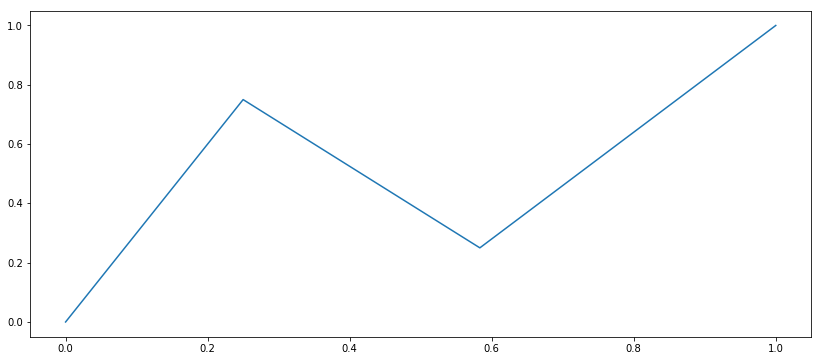

In [270]:
plt.figure(figsize=(14,6))
plt.plot(xs, ys)
plt.show()

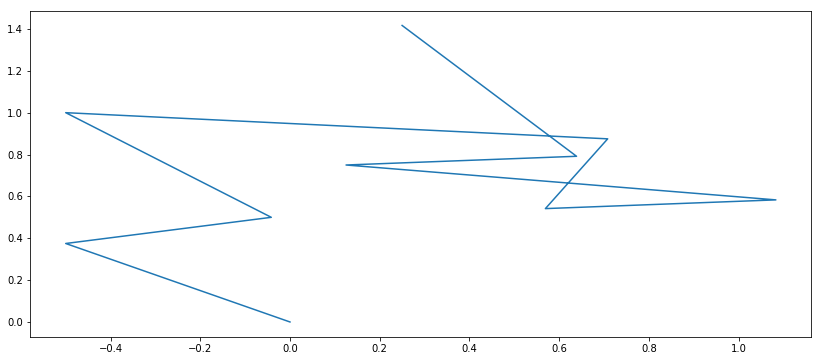

In [271]:
plt.figure(figsize=(14,6))
plt.plot(mxs, mys)
plt.show()